## Supplement 4: Classification

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [3]:
def sigmoid(x, w):
    """
    Sigmoid function.
    :param x: input features, shape (N, D)
    :param w: weights, shape (D,)
    :return: sigmoid function value
    """
    return 1 / (1 + np.exp(-np.dot(x, w)))

def nll_loss(x, y, w):
    """
    Negative log-likelihood loss function for logistic regression.
    :param x: input features, shape (N, D)
    :param y: labels, shape (N,)
    :param w: weights, shape (D,)
    :return: loss value
    """
    return -np.sum(y * np.log(sigmoid(x, w)) + (1 - y) * np.log(1 - sigmoid(x, w)))

def nll_gradient(x, y, w):
    """
    The gradient of the nll loss function
    :param x: input features, shape (N, D)
    :param y: labels, shape (N,)
    :param w: weights, shape (D,)
    :return: gradient of the loss function, shape (D,)
    """
    return np.dot(x.T, sigmoid(x, w) - y)

x = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
y = np.array([0, 1])
w = np.array([1.0, 1.0, 1.0])

print("Sigmoid: ")
print(sigmoid(x, w))
print("Loss: ")
print(nll_loss(x, y, w))
print("Gradient: ")
print(nll_gradient(x, y, w))

Sigmoid: 
[0.64565631 0.81757448]
Loss: 
1.2389012284686378
Gradient: 
[-0.00840458  0.0379185   0.08424158]


   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




In [4]:
def GradientDescent(w_0, x ,y, eta, grad, min_delta=None, max_iter=1000):
    w = [w_0]
    for i in range(max_iter):
        w.append(w[-1] - eta * grad(x, y, w[-1]))
        if min_delta is not None and np.linalg.norm(w[-1] - w[-2]) < min_delta:
            break
    return w

x = np.loadtxt('train-songs.csv', delimiter=',', skiprows=1, usecols=range(8))
y = np.loadtxt('train-songs.csv', delimiter=',', skiprows=1, usecols=8)

w_0 = np.ones(x.shape[1])
alpha = 0.000005

w = GradientDescent(w_0, x, y, alpha, nll_gradient, min_delta=1e-5, max_iter=1000)


print("Weights: ")
print(w[-1])


/tmp/ipykernel_10399/3854888975.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(x, w)))


Weights: 
[ 2.98299933e+00  5.55940588e+00  4.96989574e+01 -4.06942787e+00
  5.35842912e-03  9.14649449e-01  1.40821152e+00  5.45328647e+00]


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [5]:
x_test = np.loadtxt('test-songs.csv', delimiter=',', skiprows=1, usecols=range(8))
y_test = np.loadtxt('test-songs.csv', delimiter=',', skiprows=1, usecols=8)

def conf_matrix(scores, y, threshold=0.5):
    y_pred = scores > threshold
    return np.array([[np.sum((y == 0) & (y_pred == 0)), np.sum((y == 0) & (y_pred == 1))],
                     [np.sum((y == 1) & (y_pred == 0)), np.sum((y == 1) & (y_pred == 1))]])
'''
confusion_matrix shape
TN | FP
-------
FN | TP
'''
def metrics(scores, y, threshold=0.5):
    cm = conf_matrix(scores, y, threshold)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, f1

pred_scores = sigmoid(x_test, w[-1])
print(conf_matrix(pred_scores, y_test, threshold=0.4))
print("Precision: {0} \nRecall: {1}\nF1-score: {2}".format(*metrics(pred_scores, y_test, threshold=0.4)))



[[393 607]
 [ 29 971]]
Precision: 0.6153358681875792 
Recall: 0.971
F1-score: 0.7532971295577967


/tmp/ipykernel_10399/3854888975.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(x, w)))


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


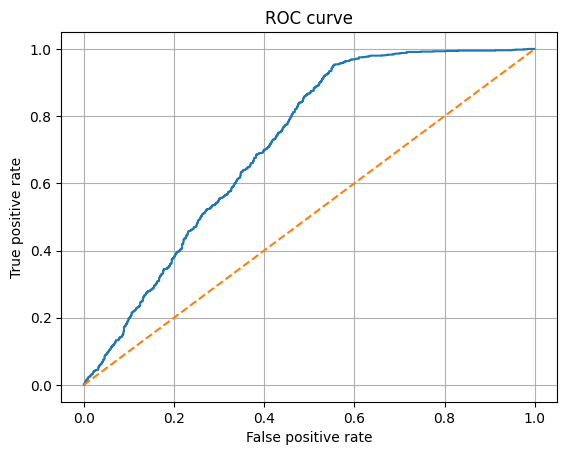

AUC: 0.7148285


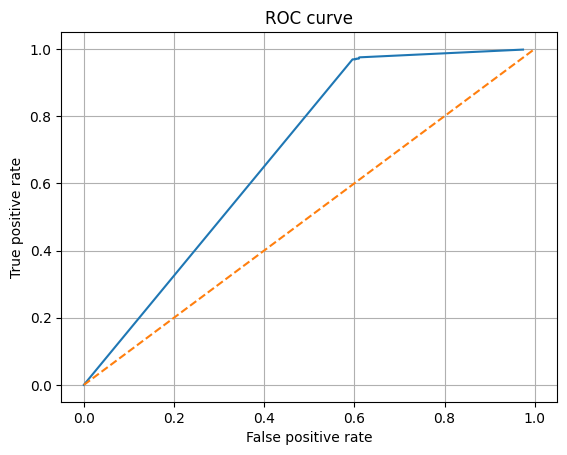

AUC: 0.6614039999999999
AUC: 0.7032579999999999


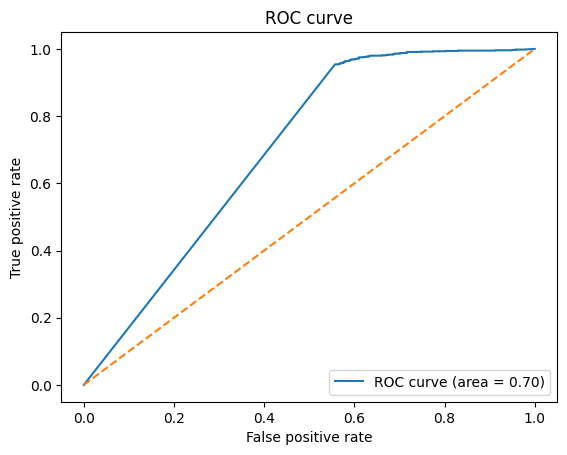

In [13]:
def plot_roc_steps(scores, y):
    """
    Plotting the ROC like described in the lecture.
    :param scores:
    :param y:
    :return:
    """
    P = np.sum(y)
    N = len(y) - P
    fpr = []
    tpr = []
    idx = np.argsort(scores)[::-1]
    scores = scores[idx]
    y = y[idx]
    for i in range(len(scores)):
        if y[i] == 0:
            # when hitting a negative sample, save the previous fpr and tpr (for using 'post' step plot)
            tpr.append(np.sum(y[:i]) / P)
            fpr.append(np.sum(1 - y[:i]) / N)


    plt.step(fpr, tpr, where='post')
    plt.grid()
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

    auc = np.trapz(tpr, fpr)
    print(f"AUC: {auc}")

def plot_roc(scores, y):
    thresholds = np.linspace(1, 0, 1000)
    tpr = []
    fpr = []
    for threshold in thresholds:
        cm = conf_matrix(scores, y, threshold)
        tpr.append(cm[1, 1] / (cm[1, 1] + cm[1, 0]))
        fpr.append(cm[0, 1] / (cm[0, 1] + cm[0, 0]))

    plt.plot(fpr, tpr)
    plt.grid()
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

    auc = np.trapz(tpr, fpr)
    print(f"AUC: {auc}")

plot_roc_steps(pred_scores, y_test)
plot_roc(pred_scores, y_test)
# compare to sklearn
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, pred_scores)
auc = auc(fpr, tpr)
print(f"AUC: {auc}")
#plot roc curve from scikit
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

/tmp/ipykernel_10399/3854888975.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(x, w)))


Model A


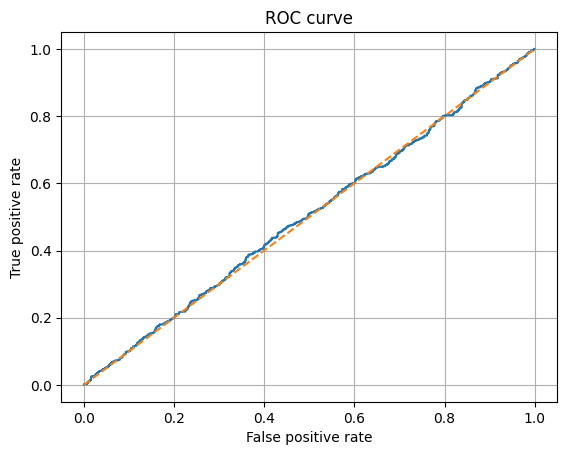

AUC: 0.5019794999999999
Model B


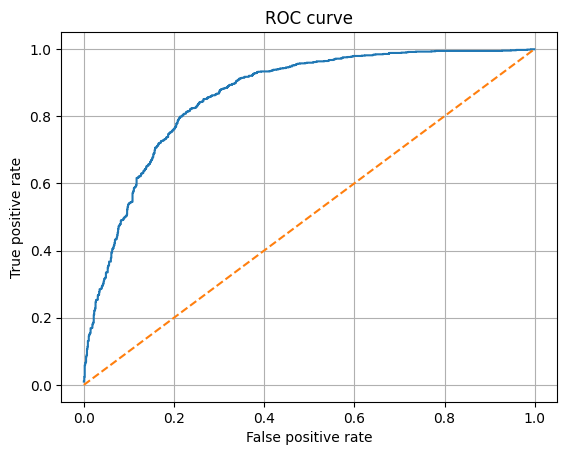

AUC: 0.8605905
Model C


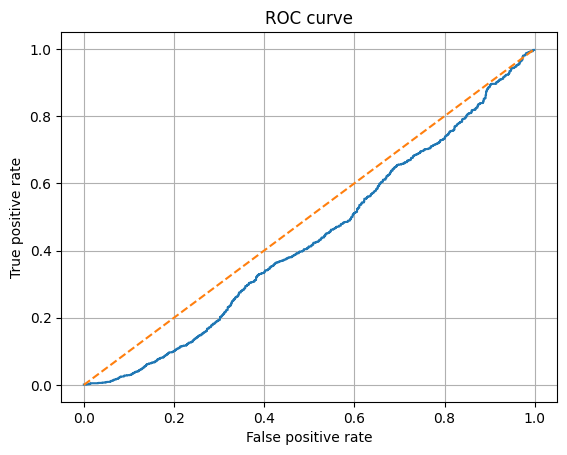

AUC: 0.434651


In [9]:
x_a = np.loadtxt('train-songs.csv', delimiter=',', skiprows=1, usecols=[0, 1, 6, 7])
x_b = np.loadtxt('train-songs.csv', delimiter=',', skiprows=1, usecols=[0, 2, 3, 4])
x_c = np.loadtxt('train-songs.csv', delimiter=',', skiprows=1, usecols=[1, 5, 6, 7])

w_0 = np.ones(x_a.shape[1])

w_a = GradientDescent(w_0, x_a, y, alpha, nll_gradient, min_delta=1e-5, max_iter=1000)
w_b = GradientDescent(w_0, x_b, y, alpha, nll_gradient, min_delta=1e-5, max_iter=1000)
w_c = GradientDescent(w_0, x_c, y, alpha, nll_gradient, min_delta=1e-5, max_iter=1000)

scores_a = sigmoid(x_test[:, [0, 1, 6, 7]], w_a[-1])
scores_b = sigmoid(x_test[:, [0, 2, 3, 4]], w_b[-1])
scores_c = sigmoid(x_test[:, [1, 5, 6, 7]], w_c[-1])

print("Model A")
plot_roc(scores_a, y_test)
print("Model B")
plot_roc(scores_b, y_test)
print("Model C")
plot_roc(scores_c, y_test)


Model B performs best with a AUC of 0.86